# STATISTICS FOR DATA SCIENCE WITH PYTHON
### by IBM Skills Network (Coursera)

## FINAL PROJECT

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
import numpy as np

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### VISUALIZATIONS

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

1. For the "Median value of owner-occupied homes" provide a boxplot

2. Provide a  bar plot for the Charles river variable

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

5. Create a histogram for the pupil to teacher ratio variable

### 1) Boxplot for the "Median value of owner-occupied homes" (MEDV)

In [4]:
boston_df['MEDV'].median()

21.2

In [5]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

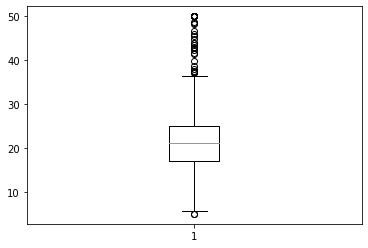

In [6]:
# a basic matplotlib boxplot
bp = plt.boxplot(boston_df['MEDV'])
plt.show()

# we see that there are many outliers above the upper cap
# let's find the upper cap value

In [7]:
type(bp)

dict

In [8]:
bp.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [9]:
[item.get_ydata()[1] for item in bp['caps']]
# or
# [item.get_ydata()[1] for item in bp['whiskers']]

[5.6, 36.5]

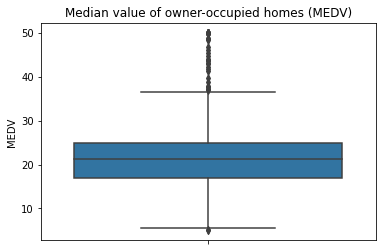

In [10]:
# now let's make a nicer boxplot with seaborn
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set(title='Median value of owner-occupied homes (MEDV)')
plt.show()

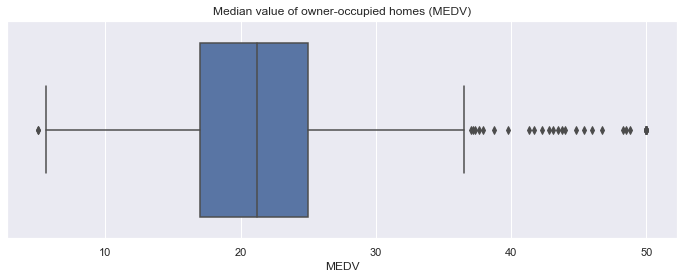

In [11]:
# a larger horizontal boxplot might help better visualize the outliers
ax = sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.boxplot(x='MEDV', data=boston_df)
ax.set(title='Median value of owner-occupied homes (MEDV)')
plt.show()

**Description:** The median of the median value of owner-occupied homes is 21.2, the mean is 22.5. Most values range between 17 and 25. There are many outliers above the upper cap of 36.5 up to a maximum of 50.

### 2) Bar plot for the Charles River (CHAS) variable

In [12]:
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

Text(0.5, 1.0, 'Count of houses bound by the Charles river')

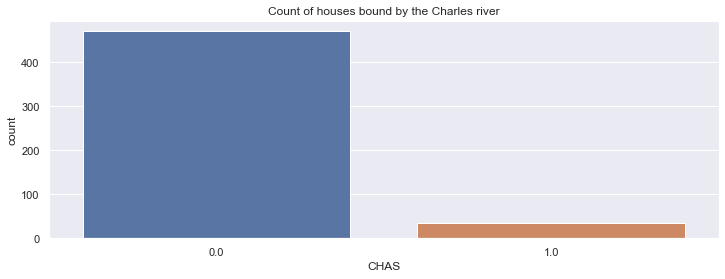

In [13]:
# CHAS is a categorical variable (1 or 0) so let's use countplot
ax = sns.countplot(x='CHAS', data=boston_df)
ax.set_title('Count of houses bound by the Charles river')

**Description:** Most houses are not bound by the Charles river. Out of a total of 506 in the survey, only 35 are, while 471 are not.

### 3) Boxplot for the MEDV vs the AGE variable

Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

The AGE variable indicates the proportion of owner-occupied units built prior to 1940

In [14]:
boston_df['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [15]:
boston_df.loc[(boston_df['AGE'] <= 53), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'


In [16]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


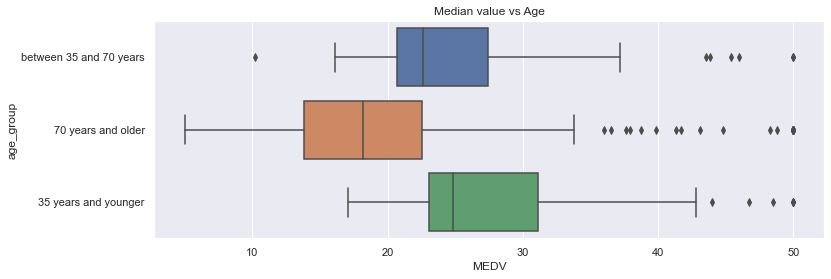

In [17]:
ax = sns.boxplot(x='MEDV', y='age_group', data=boston_df)
ax.set(title='Median value vs Age')
plt.show()

**Description:** older houses have a lower value than newer ones

### 4) Scatter plot to show the relationship between Nitric oxide concentration and the proportion of non-retail business acres per town.

[Text(0.5, 1.0, 'Relationship between proportion of non-retail businesses and concentration of nitric oxide')]

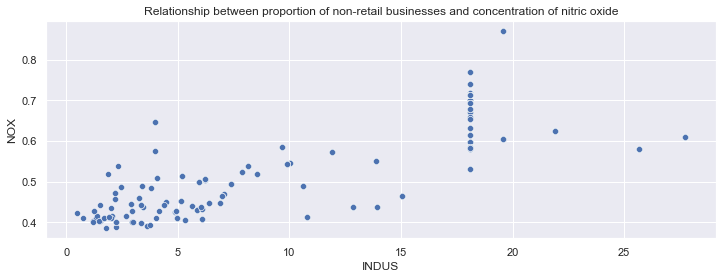

In [18]:
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
ax.set(title='Relationship between proportion of non-retail businesses and concentration of nitric oxide')

**Description:** there appears to be a linear relationship, namely that with a higher proportion of non-retail business we observe a higher concentration of nitric oxide

### Histogram for the pupil to teacher ratio variable

[Text(0.5, 1.0, 'Pupil to teacher ratio')]

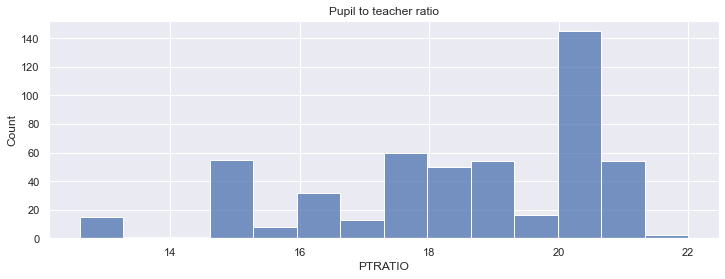

In [19]:
# with histplot
ax = sns.histplot(x='PTRATIO', data=boston_df)
ax.set(title='Pupil to teacher ratio')

### QUESTIONS

For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

### 1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Text(0.5, 1.0, 'Median value of houses bound or not by the Charles river')

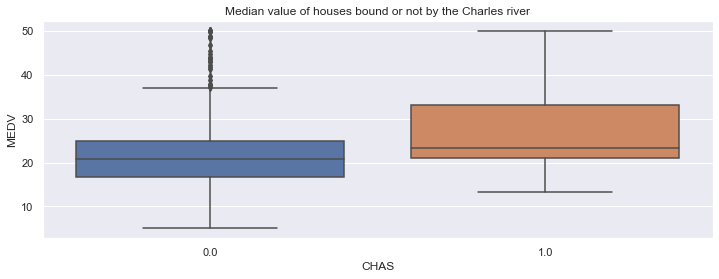

In [20]:
# We want to plot the median value MEDV 
# against the fact of being bound by the Charles river (CHAS 1 or 0)

ax = sns.boxplot(x=boston_df['CHAS'], y=boston_df['MEDV'])
ax.set_title('Median value of houses bound or not by the Charles river')

It appears that houses bound by the river have a higher value. Is there a significant difference?

We are testing a dependent continous variable (MEDV)

to see if it depends on an independent categorical variable (CHAS)

So we can use a T-test

H0: µ1 = µ2 ; our null hypothesis is that there is no significant difference between the means of the median valu of houses bound by the Charles river and that of those that aren't bound by the river

H1: µ1 ≠ µ2 ; our alternative hypothesis is that there is a significant difference

We use the significance level α = 0.05

In [21]:
# let's run the t-test (assuming homogeneity of variance)
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Since the pvalue is smaller than the alpha, we reject the null hypothesis.

There is significant difference between the mean of the median values of houses bounded by the Charles river and the mean of the median values of the houses that are not bounded by the river. Those bounded by the river have a significantly higher median value on average.

### 2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

We are comparing the means of a dependent continous variable (MEDV)

across three groups based on the age_group (<35, 35-70, >70)

Since we are working with more than two groups we use ANOVA

H0: µ1 = µ2 = µ3 ; our null hypothesis is that there is no significant difference between the means of the three groups

H1: our alternative hypothesis is that the mean of at least one of the three groups is significantly different

We use the significance level α = 0.05

In [22]:
# let's split the data of the MEDV by age_group (a column we've already created above)

thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy =boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older =  boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [23]:
# each of these is now a pandas Series
thirtyfive_lower

16     23.1
38     24.7
39     30.8
40     34.9
41     26.6
       ... 
349    26.6
352    18.6
354    18.2
355    20.6
495    23.1
Name: MEDV, Length: 91, dtype: float64

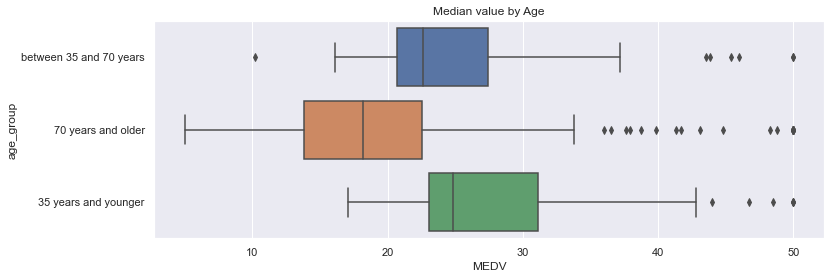

In [24]:
# We already plotted this above
ax = sns.boxplot(x='MEDV', y='age_group', data=boston_df)
ax.set(title='Median value by Age')
plt.show()

In [25]:
# now we run ANOVA on the three groups
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

As the p-value is lower than the alpha, we reject the null hypothesis and conclude that at least one of the three means is significanlty different

### 3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

[Text(0.5, 1.0, 'Relationship between proportion of non-retail businesses and concentration of nitric oxide')]

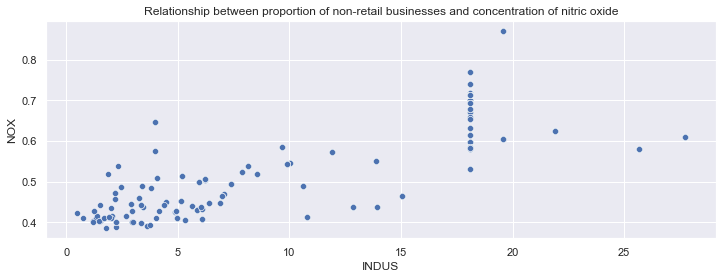

In [26]:
# We plotted this correlation above
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
ax.set(title='Relationship between proportion of non-retail businesses and concentration of nitric oxide')

From the scatterplot, there appears to be a linear relationship

Here we are testing for correlation between two continous variables

There fore we will use the Pearson correlation test

H0: There is no correlation between proportion of non-retail business acres and nitric oxide concentration
H1: There is a significant correlation

We use the significance level α = 0.05

In [27]:
# let's run the Pearson correlation test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

Since the p-value (the second value returned by the test) is smaller than alpha, we reject the null hypothesis and conclude that there is a correlation between the proportion of non-retail business acres and nitric oxide concentration.

### 4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

We are testing the correlation a dependent continous variable (MEDV, the median value of houses)

to see how it is affected by another continuous variable (DIS, the weighted distance to the 5 employment centers)

We can use a Pearson test or a regression

H0: there is no correlation
H1: there is correlation

We use use the significance level α = 0.05

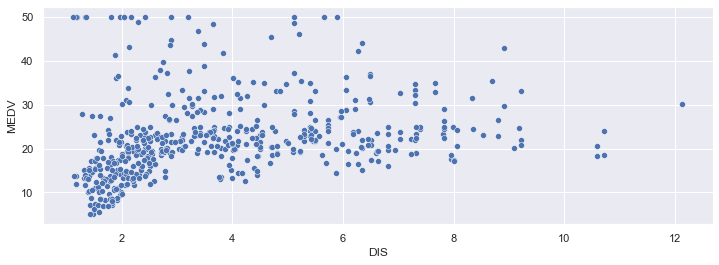

In [28]:
ax = sns.scatterplot(x="DIS", y="MEDV", data=boston_df)

In [29]:
# with Pearson
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

(0.24992873408590394, 1.2066117273368359e-08)

In [30]:
# we can obtain the same with a regression
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        17:53:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# From the table above we can see the p-value of 1.21e-08
# and we can retrieve the Pearson R coefficient
# (which is postive as shown by the regression coefficient 1.0916 being positive)
# with:
np.sqrt(model.rsquared)

0.24992873408590457

The p-value is lower than alpha, so the correlation seems significant. The Pearson R value is positive, which indicates a positive relationship, but it's low, which indicates a weak relationship. 

The impact of the distance from the Boston employment center on the median value of houses exists but it is low.